# Assignment 7

## 1. Importing Data and Libraries:


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Read the CSV file into DataFrame
url = "student-mat.csv"
df = pd.read_csv(url, sep=';', header=None)

In [109]:
# Show first 10 rows of dataset
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
7,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
8,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
9,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


In [110]:
# Assign the first row as column names
df.columns = df.iloc[0]
# Drop the duplicate header row
df = df.drop(0)
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [111]:
# Show first 10 rows of dataset
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## 2. Exploratory Data Analysis (EDA):

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    object
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    object
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [113]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object', name=0)

In [114]:
# convert to numeric data types for EDA
df['age'] = df['age'].astype('int')
df['Medu'] = df['Medu'].astype('int')
df['failures'] = df['failures'].astype('int')
df['G3'] = df['G3'].astype('int')

In [115]:
# see the basic statistics of the data
df.describe()

,age,Medu,failures,G3
count,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,0.334177,10.415190
std,1.276043,1.094735,0.743651,4.581443
min,15.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,0.000000,8.000000
50%,17.000000,3.000000,0.000000,11.000000
75%,18.000000,4.000000,0.000000,14.000000
max,22.000000,4.000000,3.000000,20.000000


In [116]:
# show unique age values
df['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

In [117]:
# show unique # of past class failures values
df['failures'].unique()

array([0, 3, 2, 1])

In [118]:
# show unique mother's education level values
df['Medu'].unique()

array([4, 1, 3, 2, 0])

In [119]:
# dataframe with only quantitative vars for correlation map
qt_df = df.drop(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis=1)
qt_df.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15
6,16,2,2,1,2,0,4,4,4,1,1,3,0,12,12,11
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,5,6
8,15,3,2,1,2,0,4,2,2,1,1,1,0,16,18,19
9,15,3,4,1,2,0,5,5,1,1,1,5,0,14,15,15


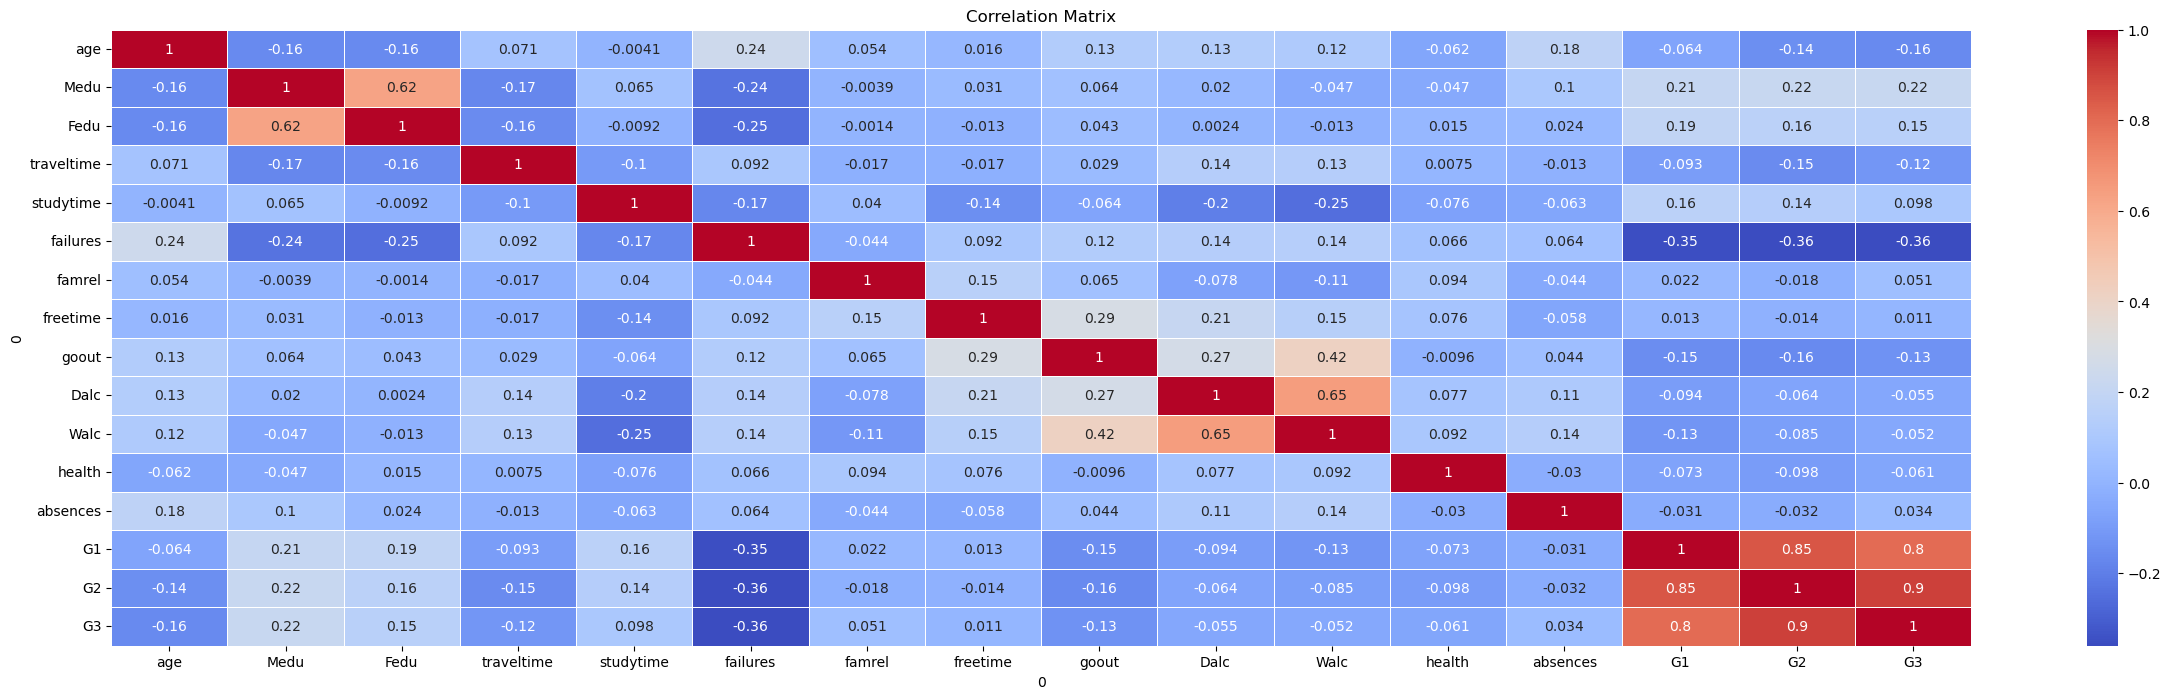

In [120]:
# show correlation matrix to see correlation between variables
corr = qt_df.iloc[:, :].corr()
plt.figure(figsize=(30, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

(array([ 82., 104.,  98.,   0.,  82.,  24.,   0.,   3.,   1.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <BarContainer object of 10 artists>)

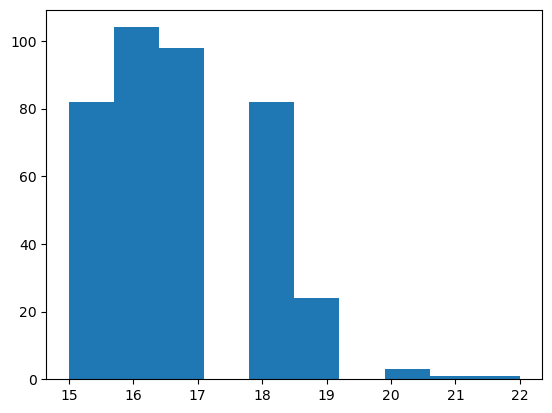

In [121]:
# histogram for age distribution
plt.hist(df['age'])

Text(0, 0.5, 'G3')

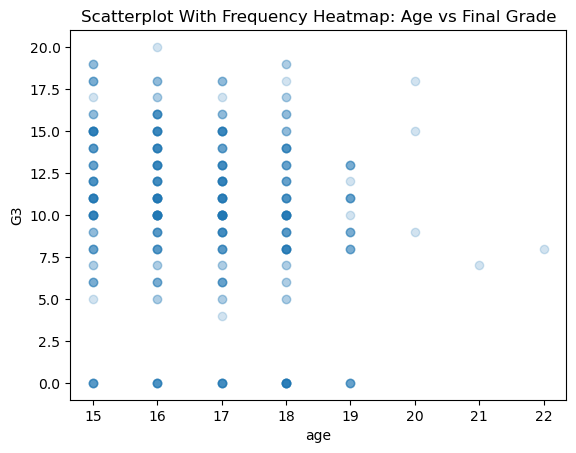

In [122]:
plt.scatter(x=df['age'], y=df['G3'], alpha=0.2)
plt.title("Scatterplot With Frequency Heatmap: Age vs Final Grade")
plt.xlabel('age')
plt.ylabel('G3')

The histogram and scatterplot show that the distribution of students' age is right skewed with most students being age 15-18.

(array([  3.,   0.,  59.,   0.,   0., 103.,   0.,  99.,   0., 131.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

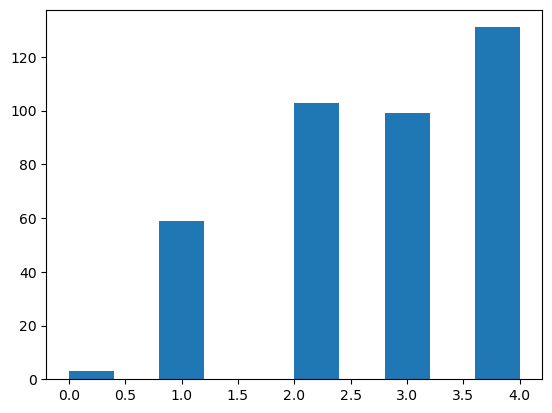

In [123]:
# histogram for Medu distribution
plt.hist(df['Medu'])

Text(0, 0.5, 'G3')

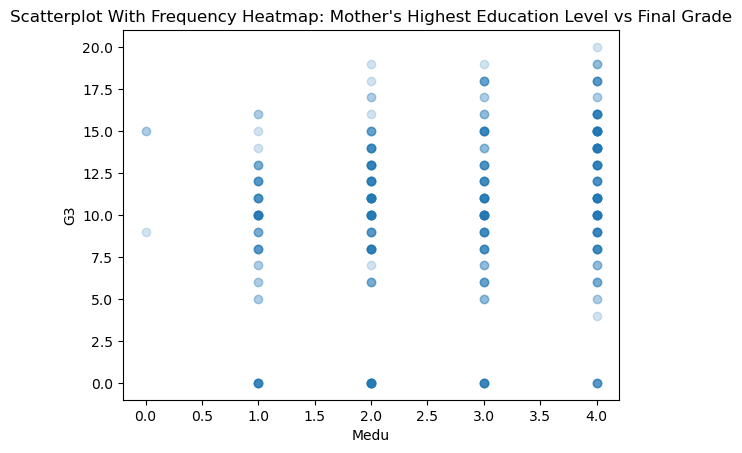

In [124]:
plt.scatter(x=df['Medu'], y=df['G3'], alpha=0.2)
plt.title("Scatterplot With Frequency Heatmap: Mother's Highest Education Level vs Final Grade")
plt.xlabel('Medu')
plt.ylabel('G3')

The histogram and scatterplot show that the distribution of students' mother's education level is left skewed with most students' mothers having education levels of at least 1 year.

(array([312.,   0.,   0.,  50.,   0.,   0.,  17.,   0.,   0.,  16.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

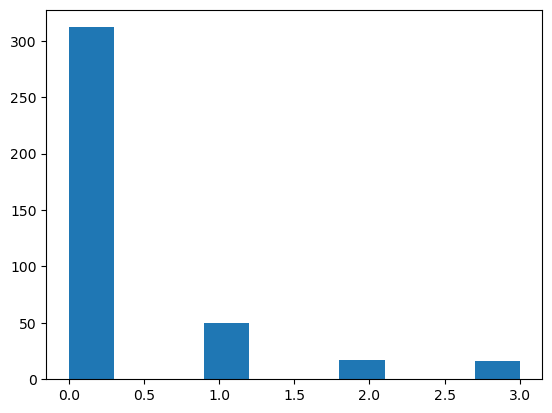

In [125]:
# histogram for failures distribution
plt.hist(df['failures'])

Text(0, 0.5, 'G3')

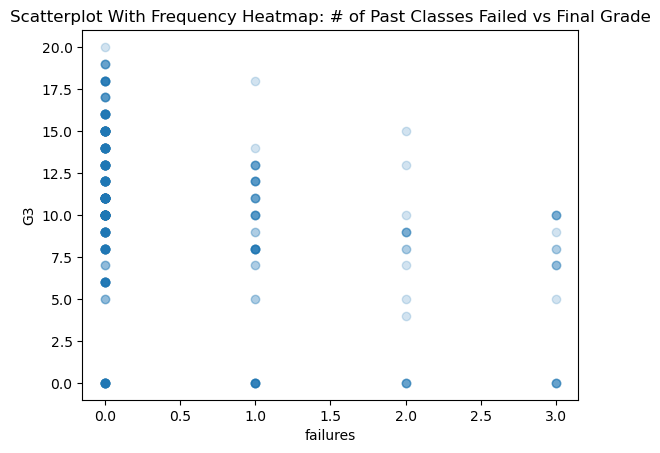

In [126]:
plt.scatter(x=df['failures'], y=df['G3'], alpha=0.2)
plt.title("Scatterplot With Frequency Heatmap: # of Past Classes Failed vs Final Grade")
plt.xlabel('failures')
plt.ylabel('G3')

The histogram and scatterplot show that the distribution of students' # of past class failures is right skewed with most students having failed 0 past classes.

## 3. Hypothesis Formulation:

### Hypothesis 1: There is a negative correlation between a student's age and their final math grade where as their age increases, their final math grade generally decreases.
I hypothesize this because based on the correlation matrix, age and G3 are negatively correlated with a correlation coefficient of -0.16. Additionally, this is also shown in the scatterplot of the distribution of students ages against their final math grades where younger age students tend to have denser clusters of higher grades.

### Hypothesis 2: There is a positive correlation between a student's mother's highest education level and their final math grade where as their mother's highest education level increases, their final math grade generally increases.
I hypothesize this because based on the correlation matrix, Medu and G3 are negatively correlated with a correlation coefficient of 0.22. Additionally, this is also shown in the scatterplot of the distribution of mother's educations against their final math grades where higher education levels of their mothers tend to have denser clusters in the higher grade ranges.

### Hypothesis 3: There is a negative correlation between a student's past classes failed and their final math grade where as their  # of past class failures increases, their final math grade generally decreases.
I hypothesize this because based on the correlation matrix, failures and G3 are negatively correlated with a correlation coefficient of -0.36. This feature has the strongest correlation to G3 among all the features (excluding G1 and G2 grade features). Additionally, this is also shown in the scatterplot of the distribution of students' past class failures against their final math grades where increased failures are more clustered towards the lower end of grades.

## 4. Hypothesis Testing:

### Hypothesis 1

Text(0, 0.5, 'G3')

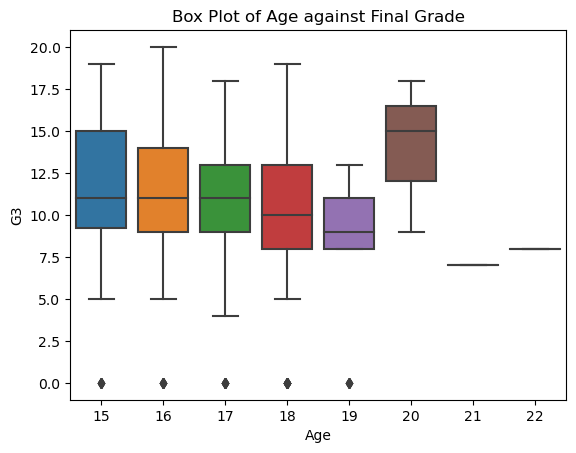

In [127]:
# boxplot showing median bc of skewed age distribution
sns.boxplot(x='age', y='G3', data=df)
plt.title('Box Plot of Age against Final Grade')
plt.xlabel('Age')
plt.ylabel('G3')

In [128]:
# show median final grades across each age group
grades_by_age = df[['age', 'G3']].groupby('age').agg(['median', 'count'])
print(grades_by_age)

0       G3      
    median count
age             
15    11.0    82
16    11.0   104
17    11.0    98
18    10.0    82
19     9.0    24
20    15.0     3
21     7.0     1
22     8.0     1


The boxplot shows that the median final grades for each age group generally decreases as they get older. Students of age 15-17 all have a median final grade of 11 which then decreases to 10 then 9 then 8. The only age group that is an exception to the decreasing trend is age 20. Overall, there appears to be a negative correlation where students' final grades tend to decrease as their ages increase.

### Hypothesis 2

Text(0, 0.5, 'G3')

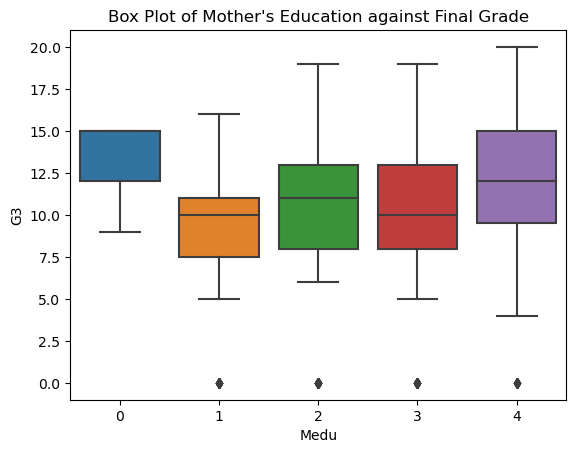

In [129]:
# boxplot showing median bc of skewed Medu distribution
sns.boxplot(x='Medu', y='G3', data=df)
plt.title("Box Plot of Mother's Education against Final Grade")
plt.xlabel('Medu')
plt.ylabel('G3')

In [130]:
# show median final grades of students grouped by their Mother's Education Level
grades_by_Medu = df[['Medu', 'G3']].groupby('Medu').agg(['median', 'count'])
print(grades_by_Medu)

0        G3      
     median count
Medu             
0      15.0     3
1      10.0    59
2      11.0   103
3      10.0    99
4      12.0   131


The boxplot shows that the median final grades for students across each mother's education group generally increases as their mother's education level increases. The exception to this overall trend is students whose mothers did not receive education with a median grade of 15. However, this median grade may be highly skewed due to this group only having 3 observations compared to the denser clusters of students whose mothers received any level of education. Excluding this group, the median final grade increases from 10 to 12 as their mother's education level increases. Overall, there appears to be a positive correlation where students' final grades tends to increase as their mother's education increases.

### Hypothesis 3

Text(0, 0.5, 'G3')

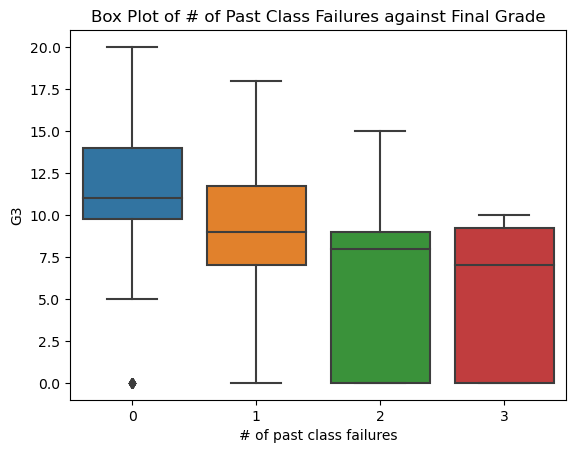

In [131]:
# boxplot for median bc of skewed past class fails distribution
sns.boxplot(x='failures', y='G3', data=df)
plt.title('Box Plot of # of Past Class Failures against Final Grade')
plt.xlabel('# of past class failures')
plt.ylabel('G3')

In [132]:
# show average final grades of students grouped by number of past classes failed
grades_by_failures = df[['failures', 'G3']].groupby('failures').agg(['median', 'count'])
print(grades_by_failures)

0            G3      
         median count
failures             
0          11.0   312
1           9.0    50
2           8.0    17
3           7.0    16


The boxplot shows that the median final grades for each group of students who failed the same # of past classes decreases as the # of past class failures increases. For students that didn't fail any classes, the median grade was 11 which then decreased to 9, 8, and 7 for 1,2, and 3 past classes failed respectively. There appears to be a direct negative correlation where students' final grades decrease as their past class failures increase.

## Documentation and Reporting:
### Why I Chose This Dataset
I chose this dataset because I was curious about which features have an impact on students' performance as on the basis of their final grades. I also wanted to find out what the strongest influencing factors were on students' final grades among the given features and thought the features given were interesting and encompassed a lot of different factors.